In [5]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview
from constants import source_path, target_name, x_path, y_path
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from libs.simple_hyper_tuner import gridsearchcv_tuner
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm
import numpy as np # linear algebra

cv = [2]
random_state = [50]
train_size = [0.8]

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)[target_name]

X.head()

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,male,22.0,1,0,7.2500,S
1,1,2,1,female,38.0,1,0,71.2833,C
2,2,3,3,female,26.0,0,0,7.9250,S
3,3,4,1,female,35.0,1,0,53.1000,S
4,4,5,3,male,35.0,0,0,8.0500,S


> Model: SVC
- Accuracy score:  0.5754189944134078
- Accuracy count:  103 / 179
- Precision score:  0.5957153124897906
- Recall score:  0.5754189944134078
- F1 score:  0.4572579843942255
GridSearchCV Training Results:
- Best Score:  0.6502808988764045
Params:
- cv:  2
- Splitter Params:  {'train_size': 0.8, 'random_state': 50}
- Model Params:  SVC()
- Best H-Params:  {'decision_function_shape': 'ovr', 'kernel': 'poly'}

Done.


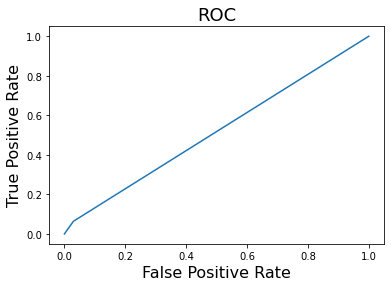

In [2]:
params = [
    {   # Binary or Multiclass - One-Vs-One and One-vs-Rest
        # https://www.baeldung.com/cs/svm-multiclass-classification
        'splitter': {'train_size': train_size, 'random_state': random_state},
        'cv': cv,
        'model': svm.SVC(),
        'hyperparams': {
            'decision_function_shape': ['ovr', 'ovo']
            , 'kernel': ['rbf', 'poly']
            # , 'shrinking': [True, False]
            # , 'coef0': [0, 0.2, 0.4]
            # , 'gamma' : ['scale', 'auto']
            # , 'degree': [1, 2, 3, 4, 5]
            # , 'C': [1, 0.1, 0.4, 0.7, 1.2]
        }
    }
]

model = gridsearchcv_tuner(X, y, params, 1)

In [3]:
params = [
    {
        'splitter': {'train_size': train_size, 'random_state': random_state},
        'cv': cv,
        'model': LinearRegression(copy_X=True),
        'hyperparams': {
            # 'fit_intercept': [True, False]
        }
    }
]

gridsearchcv_tuner(X, y, params, 1)

> Model: LinearRegression


ValueError: Classification metrics can't handle a mix of binary and continuous targets

> Model: RandomForestClassifier
- Accuracy score:  0.7932960893854749
- Accuracy count:  142 / 179
- Precision score:  0.8080292927472599
- Recall score:  0.7932960893854749
- F1 score:  0.7859880614011752
GridSearchCV Training Results:
- Best Score:  0.8075842696629214
Params:
- cv:  2
- Splitter Params:  {'train_size': 0.8, 'random_state': 50}
- Model Params:  RandomForestClassifier(criterion='entropy', max_depth=6, max_samples=70,
                       n_estimators=110, oob_score=True, random_state=0,
                       warm_start=True)
- Best H-Params:  {}

Done.


RandomForestClassifier(criterion='entropy', max_depth=6, max_samples=70,
                       n_estimators=110, oob_score=True, random_state=0,
                       warm_start=True)

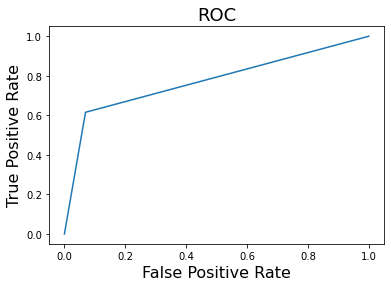

In [7]:
params = [
    {
        'splitter': {'train_size': train_size, 'random_state': random_state},
        'cv': cv,
        'model': RandomForestClassifier(
            max_depth=6, max_features="auto", max_samples=70, bootstrap=True, oob_score=True, random_state=0
            , criterion='entropy', n_estimators=110
            , warm_start=True
        ),
        'hyperparams': {
            # 'warm_start':[True, False]
            # 'criterion': ["gini", "entropy"]
                    # 'max_features':["auto", "sqrt", "log2"]
                    # , 'max_samples': range(50, 80, 5)
                    # , 'n_estimators': range(80, 150, 10)
                    # 'random_state': range(0, 50, 10)
                    # , 'max_depth': range(4, 8, 1)
        }
    }
]

gridsearchcv_tuner(X, y, params, 1)

> Model: GradientBoostingClassifier
- Accuracy score:  0.8044692737430168
- Accuracy count:  144 / 179
- Precision score:  0.8060825660206549
- Recall score:  0.8044692737430168
- F1 score:  0.802101506489654
GridSearchCV Training Results:
- Best Score:  0.8174157303370786
Params:
- cv:  2
- Splitter Params:  {'train_size': 0.8, 'random_state': 50}
- Model Params:  GradientBoostingClassifier(learning_rate=0.025, max_depth=5,
                           max_features='auto', n_estimators=400,
                           random_state=0)
- Best H-Params:  {}

Done.


GradientBoostingClassifier(learning_rate=0.025, max_depth=5,
                           max_features='auto', n_estimators=400,
                           random_state=0)

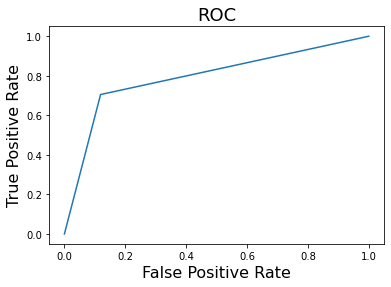

In [8]:

params = [
    {
        'splitter': {'train_size': train_size, 'random_state': random_state},
        'cv': cv,
        'model': GradientBoostingClassifier(
            n_estimators=400, random_state=0, learning_rate=0.025, max_depth=5, max_features="auto"
            # loss='deviance', max_features="auto"
            # , criterion='squared_error', learning_rate=1.2, max_depth=6
            # , n_estimators=75, random_state=6
        ),
        'hyperparams': {
            #             'criterion': ['friedman_mse', 'mse', 'mae'],
            #             # 'loss':['deviance', 'exponential'],
            #             'random_state': range(5, 8, 1),
            #             'n_estimators': range(60, 90, 5),
            #             'learning_rate': np.arange(1, 1.4, 0.1),
            #             'max_depth': range(4, 9, 1)
        }
    }
]

gridsearchcv_tuner(X, y, params, 1)